# Capstone 1 Group 4 Notebook

## Business Understanding

* **Stakeholders** - Computing Vision is a new entrant into the movie studio space.
* **Problem** - Computing Vision wishes to launch original movies in a well-established field and needs recommendations on what to make.
* **Project Value** - We will attempt to find the best genres and production budgets to succeed in the film industry and recommend these findings to Computing Vision.

## Data Understanding

### Importing necessary libraries

In [1]:
# 3rd party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# standard library
import sqlite3
import math

# set theme and context
sns.set_theme(style="white")
sns.set_context('poster', rc={'patch.linewidth': 0.6})

### Loading data

In [2]:
tn_movie_budgets = pd.read_csv('./data/tn.movie_budgets.csv')
tmdb_csv = pd.read_csv('./data/tmdb.movies.csv')

conn = sqlite3.connect('./data/im.db')

Sqlite_df = pd.read_sql("""
select *
from movie_basics
join movie_ratings
using (movie_id)
join movie_akas
using (movie_id)
group by primary_title
;
""", conn)

### Viewing Data

In [3]:
tn_movie_budgets.head(2)

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875

In [4]:
tn_movie_budgets.info()
# no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
# let's look at production budget
tn_movie_budgets['production_budget'].str.lstrip('$').str.replace(',', '').astype(np.int64).describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

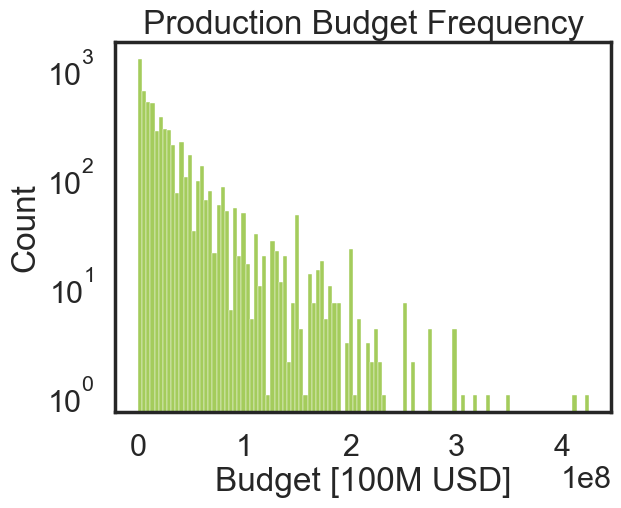

In [6]:
sns.histplot(x=tn_movie_budgets['production_budget'].str.lstrip('$').str.replace(',', '').astype(np.int64), color='#86BC25')
plt.title('Production Budget Frequency')
plt.xlabel('Budget [100M USD]')
plt.yscale('log')

In [7]:
# let's look at worldwide gross
tn_movie_budgets['worldwide_gross'].str.lstrip('$').str.replace(',', '').astype(np.int64).describe()

count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64

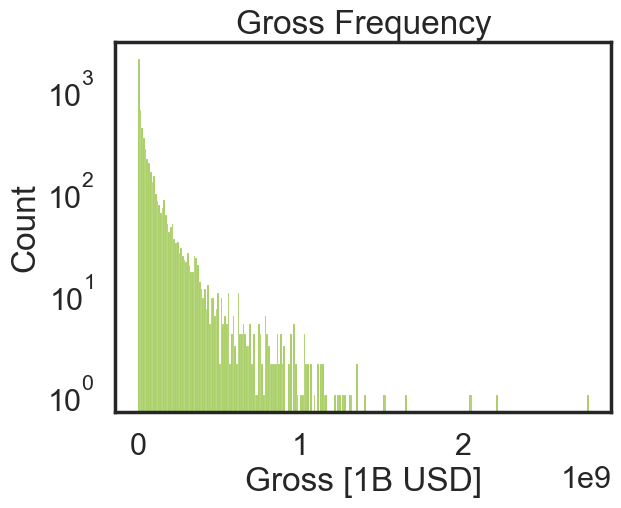

In [8]:
sns.histplot(x=tn_movie_budgets['worldwide_gross'].str.lstrip('$').str.replace(',', '').astype(np.int64), color='#86BC25')
plt.title('Gross Frequency')
plt.xlabel('Gross [1B USD]')
plt.yscale('log')

In [9]:
tmdb_csv.head(2)

Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610

In [10]:
tmdb_csv.info()
# no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [11]:
# let's look at summary statistics
tmdb_csv.describe()

Unnamed: 0             id    popularity  vote_average    vote_count
count  26517.00000   26517.000000  26517.000000  26517.000000  26517.000000
mean   13258.00000  295050.153260      3.130912      5.991281    194.224837
std     7654.94288  153661.615648      4.355229      1.852946    960.961095
min        0.00000      27.000000      0.600000      0.000000      1.000000
25%     6629.00000  157851.000000      0.600000      5.000000      2.000000
50%    13258.00000  309581.000000      1.374000      6.000000      5.000000
75%    19887.00000  419542.000000      3.694000      7.000000     28.000000
max    26516.00000  608444.000000     80.773000     10.000000  22186.000000

In [12]:
Sqlite_df.head(2)

movie_id          primary_title        original_title  start_year  \
0  tt1699720  !Women Art Revolution  Women Art Revolution        2010   
1  tt2346170       #1 Serial Killer      #1 Serial Killer        2013   

   runtime_minutes       genres  averagerating  numvotes  ordering  \
0             83.0  Documentary            6.9       196         1   
1             87.0       Horror            5.6        40         1   

                   title region language        types attributes  \
0  !Women Art Revolution    XWW       en  imdbDisplay       None   
1                  Chink   None     None      working       None   

   is_original_title  
0                0.0  
1                0.0

In [13]:
Sqlite_df.info()
# some nulls but we're primarily interested in the 'title' and 'genres' columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65975 entries, 0 to 65974
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           65975 non-null  object 
 1   primary_title      65975 non-null  object 
 2   original_title     65975 non-null  object 
 3   start_year         65975 non-null  int64  
 4   runtime_minutes    59541 non-null  float64
 5   genres             65359 non-null  object 
 6   averagerating      65975 non-null  float64
 7   numvotes           65975 non-null  int64  
 8   ordering           65975 non-null  int64  
 9   title              65975 non-null  object 
 10  region             55054 non-null  object 
 11  language           5392 non-null   object 
 12  types              22822 non-null  object 
 13  attributes         1967 non-null   object 
 14  is_original_title  65975 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 7.6+ MB


In [14]:
Sqlite_df.describe()

start_year  runtime_minutes  averagerating      numvotes  ordering  \
count  65975.000000     59541.000000   65975.000000  6.597500e+04   65975.0   
mean    2014.012899        94.612183       6.319038  3.741121e+03       1.0   
std        2.532482       219.772045       1.461933  3.155679e+04       0.0   
min     2010.000000         3.000000       1.000000  5.000000e+00       1.0   
25%     2012.000000        81.000000       5.500000  1.400000e+01       1.0   
50%     2014.000000        91.000000       6.500000  5.300000e+01       1.0   
75%     2016.000000       103.000000       7.300000  3.040000e+02       1.0   
max     2019.000000     51420.000000      10.000000  1.841066e+06       1.0   

       is_original_title  
count       65975.000000  
mean            0.144373  
std             0.351470  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000

### Description, statistics, features, and limitations

**Description**
- tn.movie_budgets - production budget and gross
- tmdb.movies - genres
- im.db - secondary list of genres

**Statistics**
- Of particular note, we see that the production budget and worldwide gross are not normally distributed but skewed to the right.

**features**
- We'll primarily use the production budget and worldwide gross columns from tn.movie_budgets, and from tmdb.movies, we'll translate the genre ids into genres. Finally, we use im.db as a secondary source for genres because it contains more movies.

**limitations**
- Because we only have 5782 movies in the budget dataset, we have at most that many data points when we look at budget and gross. Furthermore, movies will be lost during the merges because not every dataset contains the same movies.

## Data Preparation

### Converting genre IDs to genre names

In [15]:
# We're assuming the above cells have been run, so we should have access to the loaded dataframes and libraries.

# Creating dictionary to turn genre IDs into genres (from: www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)
comment = """Action          28
Adventure       12
Animation       16
Comedy          35
Crime           80
Documentary     99
Drama           18
Family          10751
Fantasy         14
History         36
Horror          27
Music           10402
Mystery         9648
Romance         10749
Science Fiction 878
TV Movie        10770
Thriller        53
War             10752
Western         37"""
id_to_genre = {line.split(' ')[-1]:' '.join(line.split(' ')[:-1]).strip() for line in comment.split('\n')}

# Creating function to transform genre IDs
def convert_ids(line):
    """
    Takes single line of genre ids and converts them into genre strings
    :param line: string of genre ids
    :returns: string of comma separated genres
    """
    return ', '.join(sorted([id_to_genre.get(x.strip(), x.strip()) for x in line[1:-1].split(',')]))

# Transforming and further cleaning genre IDs
Sqlite_df['title'] = Sqlite_df.title.str.lower()

tmdb_csv['genre'] = tmdb_csv.genre_ids.apply(convert_ids)
tmdb_csv.drop(columns=["Unnamed: 0", 'id'], inplace=True)
tmdb_csv['release_date'] = pd.to_datetime(tmdb_csv['release_date'])
tmdb_csv['title'] = tmdb_csv['title'].str.lower()

#Cleaning tn movie budget data
tn_movie_budgets.drop(columns=['id'], inplace=True)
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].str.lower()
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.lstrip('$').str.replace(',', '').astype(np.int64)
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.lstrip('$').str.replace(',', '').astype(np.int64)
non_zero = tn_movie_budgets[(tn_movie_budgets['worldwide_gross'] > 0) & (tn_movie_budgets['production_budget'] > 0)].copy()
non_zero['profit'] = non_zero['worldwide_gross'] - non_zero['production_budget']
non_zero['profit_on_budget'] = (non_zero['profit'] / non_zero['production_budget']) * 100
non_zero.sort_values(by=['profit_on_budget'], ascending=False, inplace=True)

#Merging both datasets
tmdb_csv = tmdb_csv.merge(Sqlite_df, on='title', how='left')
budget_genre = non_zero.merge(tmdb_csv, left_on=['movie', 'release_date'], right_on=['title', 'release_date'], how='inner').drop_duplicates()

## Data Visualization and Analysis

### Create custom color palette and set context

In [16]:
# Function from Abdo and Ch3steR (from: stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot)
# Palette documentation (from: seaborn.pydata.org/generated/seaborn.color_palette.html)
custom_palette = 'blend:#046A38,#86BC25'

def colors_from_values(values, palette_name=custom_palette):
    # normalize the values to range [0, 1]
    normalized = (values - np.min(values)) / (np.max(values) - np.min(values))
    # convert to indices
    indices = np.round((1 - normalized) * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [17]:
# set theme and context
sns.set_theme(style="whitegrid")
sns.set_context('poster', rc={'patch.linewidth': 0.6})

### Grouping genres

In [18]:
# we need several movies of each genre before we can classify it as distinct and prevents a one-off genre
at_least_10_in_genre = budget_genre.groupby('genre').filter(lambda x: len(x) >= 10)
at_least_10_in_genre.groupby('genre')['profit_on_budget'].describe()
# we want to group by similar genres and medians
# would like to figure out hierarchical clustering on the genre_ids but would take too long

count         mean          std  \
genre                                                                          
Action, Adventure, Fantasy                    16.0   253.028273   161.022291   
Action, Adventure, Fantasy, Science Fiction   11.0   239.881547   186.080319   
Action, Adventure, Science Fiction            32.0   235.570714   192.467314   
Action, Comedy                                14.0   116.004372   150.306836   
Action, Comedy, Crime                         11.0   140.310178   185.951231   
Action, Crime, Drama, Thriller                14.0   118.082674   158.965801   
Action, Crime, Thriller                       26.0    77.858534   181.162041   
Action, Science Fiction, Thriller             11.0   181.445684   205.236444   
Action, Thriller                              20.0   214.457720   230.440367   
Adventure, Animation, Comedy, Family          23.0   338.892403   352.624217   
Comedy                                        75.0   188.229113   259.308334   
Comedy, Drama                                 52.0   248.891622   410.666001   
Comedy, Drama, Romance                        33.0   283.258984   474.255837   
Comedy, Romance                               34.0   269.588279   362.918823   
Crime, Drama, Thriller                        25.0    70.456894   162.911889   
Drama                                         94.0   235.656139   571.874538   
Drama, History                                18.0   114.800743   141.811452   
Drama, Music                                  11.0   308.793218   536.008824   
Drama, Mystery, Thriller                      10.0   158.509280   348.773977   
Drama, Romance                                41.0   311.484289   497.095641   
Drama, Thriller                               31.0   202.684771   447.192812   
Horror                                        16.0  1130.460894  1340.564785   
Horror, Mystery, Thriller                     19.0  1381.421966  1338.563949   
Horror, Thriller                              33.0  2613.461754  7353.102057   

                                                   min         25%  \
genre                                                                
Action, Adventure, Fantasy                  -29.604297  163.130391   
Action, Adventure, Fantasy, Science Fiction  -0.830889  103.172636   
Action, Adventure, Science Fiction          -54.369200   75.722182   
Action, Comedy                              -69.289036   37.743279   
Action, Comedy, Crime                       -13.816140   40.798950   
Action, Crime, Drama, Thriller              -90.098383  -10.520094   
Action, Crime, Thriller                     -91.483595  -56.350483   
Action, Science Fiction, Thriller           -99.894400   35.000375   
Action, Thriller                            -81.278432  111.824321   
Adventure, Animation, Comedy, Family         -9.428220  158.546312   
Comedy                                      -99.449833   18.244709   
Comedy, Drama                               -89.305460   15.667838   
Comedy, Drama, Romance                      -99.178222   -5.168127   
Comedy, Romance                             -83.570610   54.162875   
Crime, Drama, Thriller                      -97.912245  -66.500874   
Drama                                       -99.830900  -54.318143   
Drama, History                              -57.263041   22.156142   
Drama, Music                                -58.370657   -4.957561   
Drama, Mystery, Thriller                    -99.313000  -75.904826   
Drama, Romance                              -89.997117  -18.580000   
Drama, Thriller                             -92.542143  -10.771422   
Horror                                      -88.966667  231.111990   
Horror, Mystery, Thriller                   -38.484867  307.492300   
Horror, Thriller                            -98.811200   87.420720   

                                                    50%          75%  \
genre                                                                  

In [19]:
# manually map the groups
def consolidate_genre(genre_list):
    """
    Hardcoded map to condense the genres
    :param genre_list: string of comma separated genres
    :returns: string consolidating the genres
    """
    if genre_list.startswith('Action, Adventure'):
        return 'Action, Adventure'
    elif genre_list.startswith('Action, Comedy'):
        return 'Action, Comedy'
    elif genre_list == 'Action, Crime, Thriller' or genre_list == 'Crime, Drama, Thriller':
        return 'Crime, Thriller'
    elif (genre_list.startswith('Action') and genre_list.endswith('Thriller')) or genre_list == 'Drama, Thriller':
        return 'Thriller'
    elif genre_list.startswith('Adventure, Animation'):
        return 'Adventure, Animation'
    elif genre_list.startswith('Comedy'):
        return 'Comedy, Other'
    elif genre_list == 'Drama, Mystery, Thriller':
        return 'Drama, Mystery, Thriller'
    elif genre_list == 'Drama, Romance':
        return 'Drama, Romance'
    elif 'Drama' in genre_list:
        return 'Drama, Other'
    elif genre_list.startswith('Horror'):
        return 'Horror, Other'
    else:
        return genre_list

In [20]:
# consolidate the genres
at_least_10_in_genre['consolidated_genre'] = at_least_10_in_genre['genre'].apply(consolidate_genre)

### Top profit over production budget (POPB) by genres

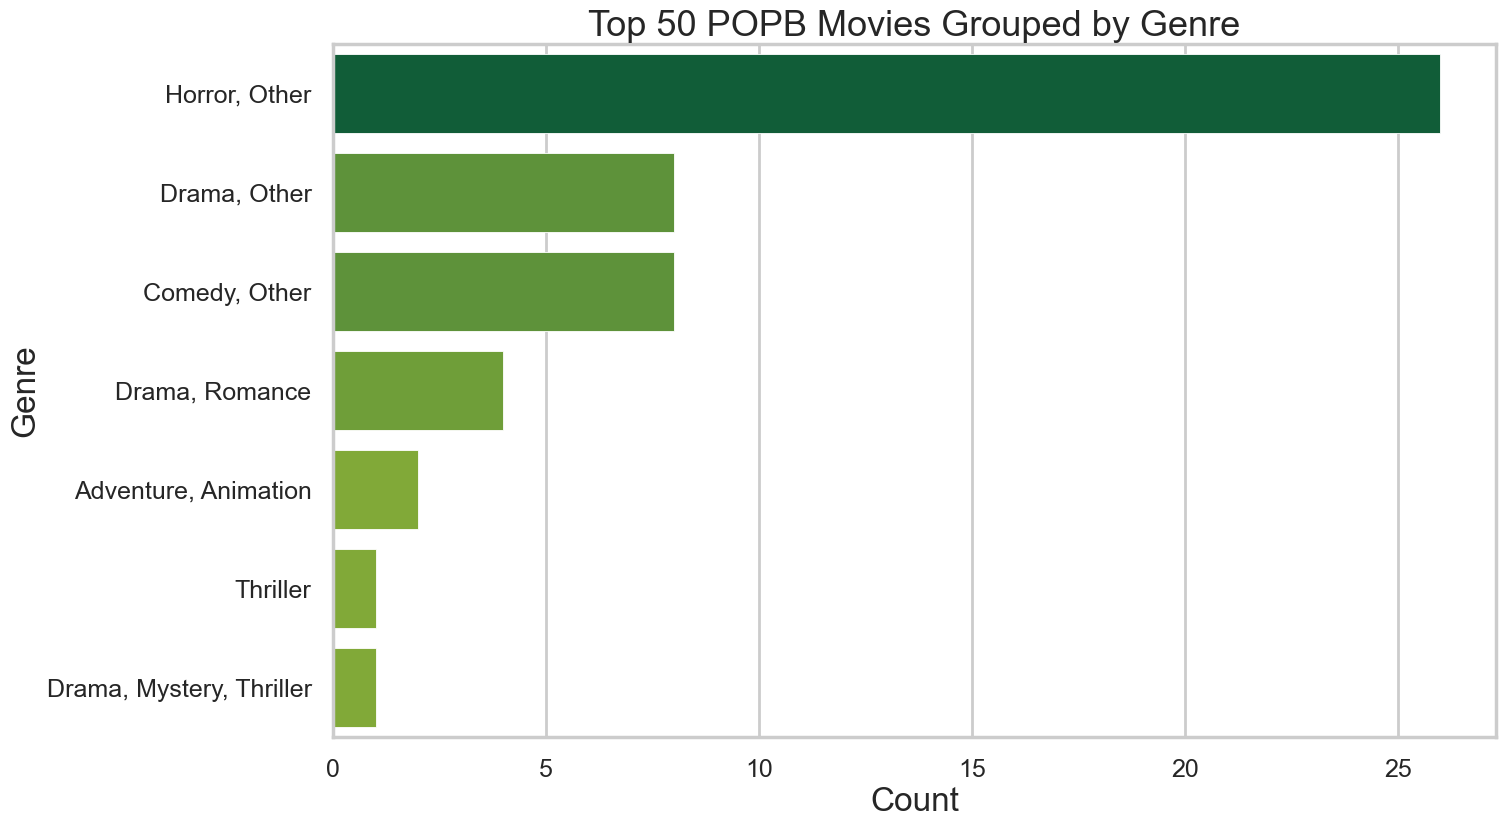

In [21]:
# grab the top 50 return on budget movies and count the genres
genre_combined = at_least_10_in_genre.iloc[:50]['consolidated_genre'].value_counts()
genre_combined_df = genre_combined.reset_index()
genre_combined_df.columns = ['genre', 'count']

plt.figure(figsize=(15,9))
sns.barplot(data=genre_combined_df.iloc[:8], x='count', y='genre', orient='h', palette=colors_from_values(genre_combined_df['count']))
plt.title('Top 50 POPB Movies Grouped by Genre', fontsize=26)
plt.xlabel('Count', fontsize=24)
plt.ylabel('Genre', fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
#plt.savefig('images/top_POPB.svg', format='svg', bbox_inches='tight')
None

### Median POPB grouped by genres

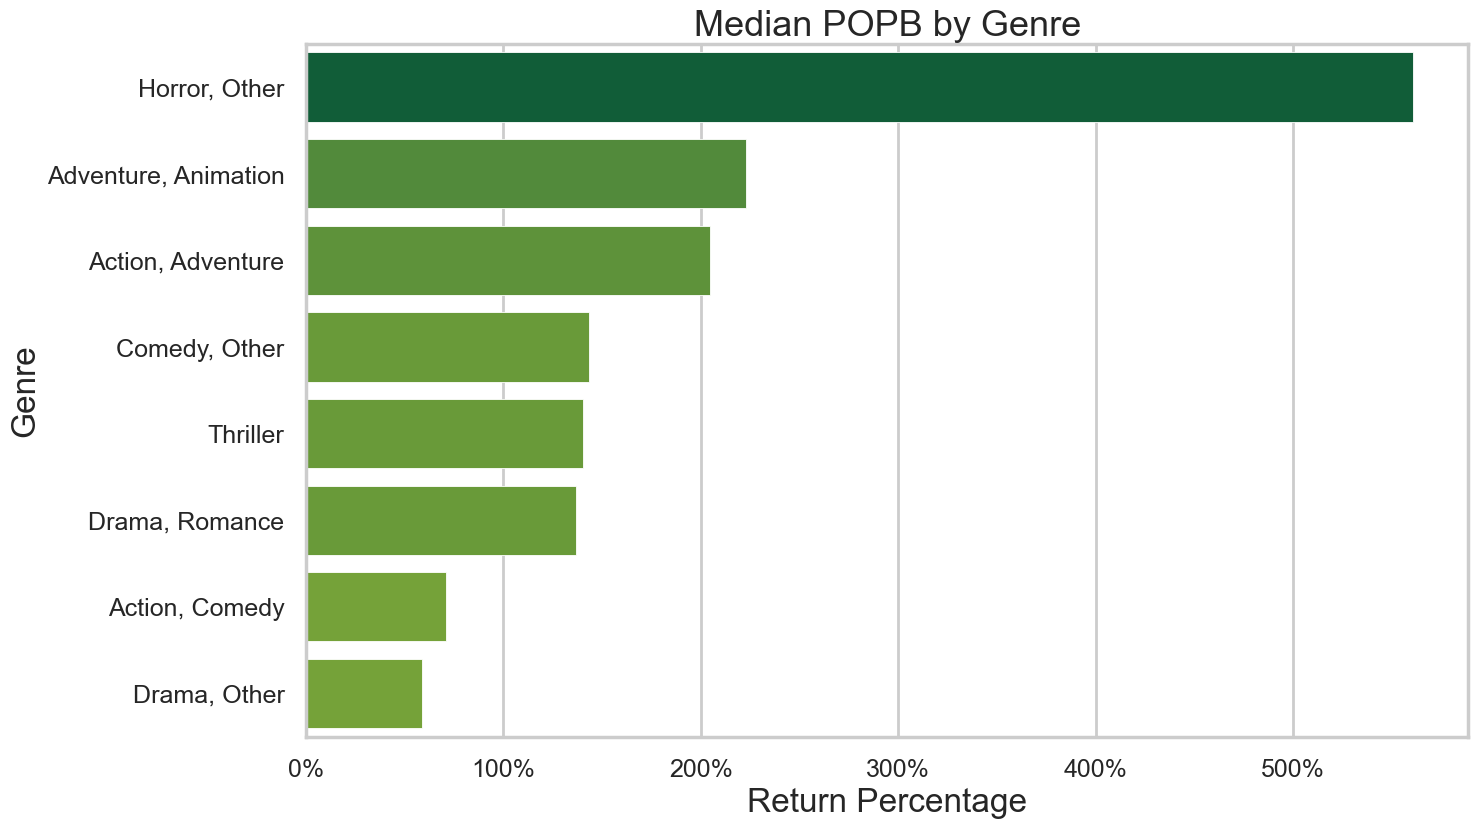

In [22]:
# get the median profit over production budget
median_genre = at_least_10_in_genre.groupby('consolidated_genre')['profit_on_budget'].median().sort_values(ascending=False)
median_genre_df = median_genre.reset_index()
median_genre_df.columns = ['genre', 'median profit over budget']

# plot 
plt.figure(figsize=(15,9))
sns.barplot(data=median_genre_df.iloc[:8], x='median profit over budget', y='genre', palette=colors_from_values(median_genre_df['median profit over budget']), orient='h')
plt.title('Median POPB by Genre', fontsize=26)
plt.xlabel('Return Percentage', fontsize=24)
plt.ylabel('Genre', fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(ticks=[0, 100, 200, 300, 400, 500], labels=['0%', '100%', '200%', '300%', '400%', '500%'], fontsize=18)
#plt.savefig('images/median_POPB.svg', format='svg', bbox_inches='tight')
None

### Boxplots of production budget by genres

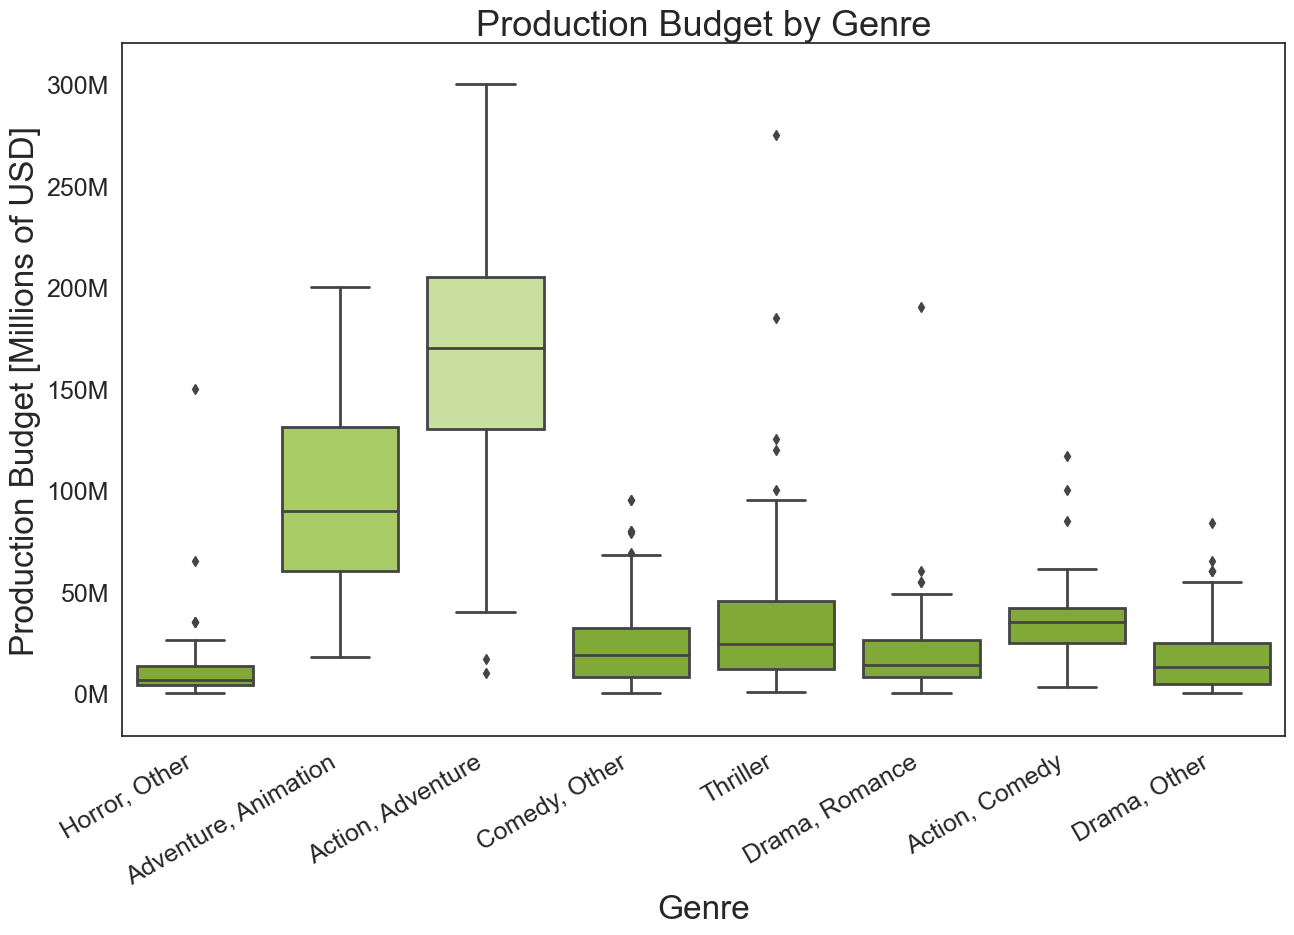

In [23]:
sns.set_theme(style="white")

plt.figure(figsize=(15,9))
color_map = {genre: '#aedd55' if genre == 'Adventure, Animation' else '#ccea95' if genre == 'Action, Adventure' else '#86BC25' for genre in median_genre.index[:-2]}
sns.boxplot(data=at_least_10_in_genre, x='consolidated_genre', y='production_budget', order=median_genre.index[:-2], linewidth=2, palette=color_map)
plt.title('Production Budget by Genre', fontsize=26)
plt.ylabel('Production Budget [Millions of USD]', fontsize=24)
plt.xlabel('Genre', fontsize=24)
plt.ylim(top=320_000_000)
plt.yticks(ticks=[0, 50_000_000, 100_000_000, 150_000_000, 200_000_000, 250_000_000, 300_000_000], labels=['0M', '50M', '100M', '150M', '200M', '250M', '300M'], fontsize=18)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=18)
#plt.savefig('images/PB_distribution.svg', format='svg', bbox_inches='tight')

sns.set_theme(style="whitegrid")
sns.set_context('poster', rc={'patch.linewidth': 0.6})

### **Finding 1: High return genres**

**Horror films have outstanding profit compared to production budget.** As a new studio, we might be cash strapped and the combination of low production budget and high returns is an enticing prospect.

### Top combined genres profit

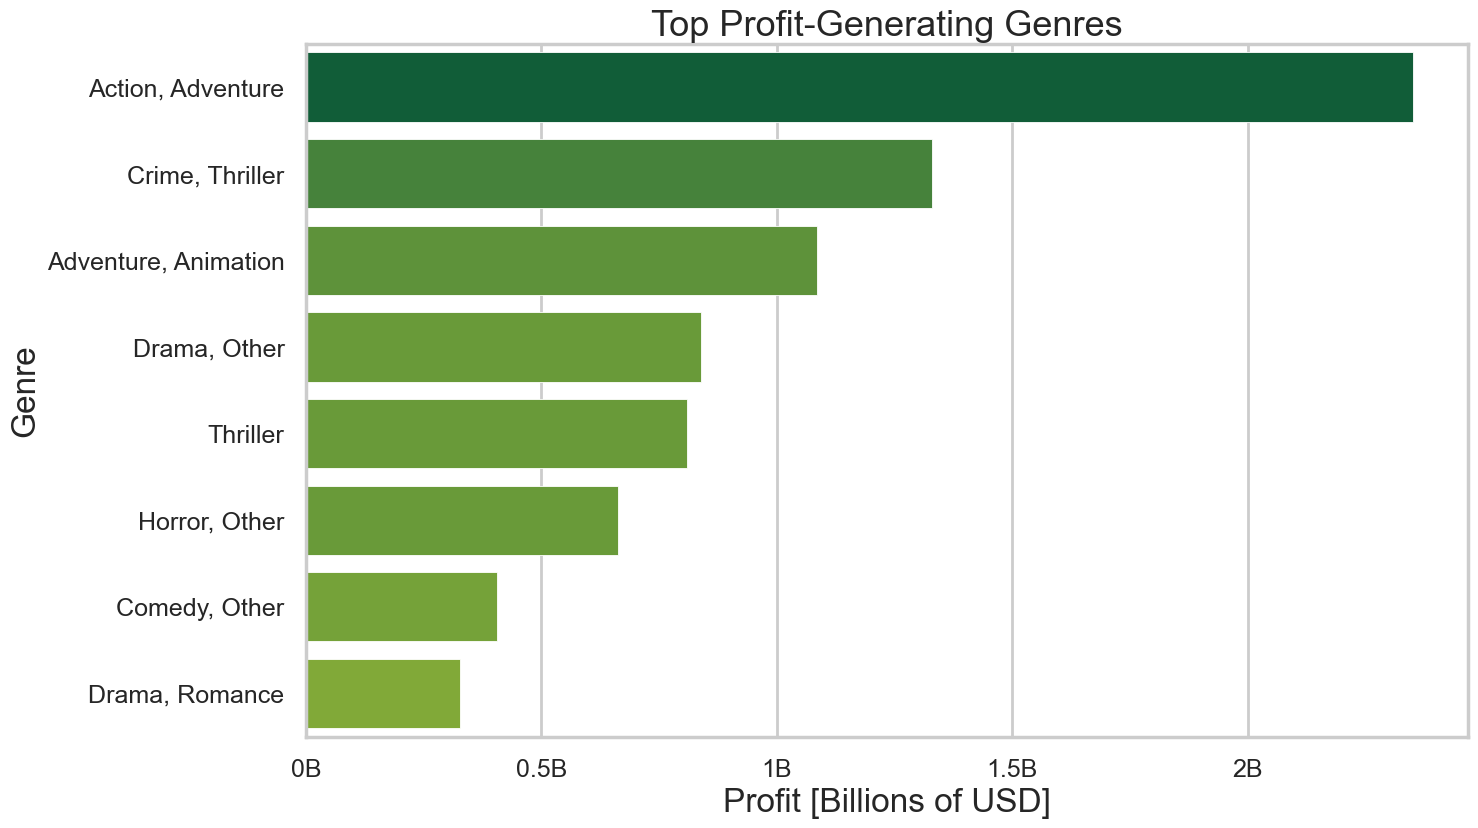

In [24]:
# get the maximum profit movie from each genre
max_profit_genre = at_least_10_in_genre.groupby('consolidated_genre')['profit'].max().sort_values(ascending=False)
max_profit_genre_df = max_profit_genre.reset_index()
max_profit_genre_df.columns = ['genre', 'profit']

plt.figure(figsize=(15,9))
sns.barplot(data=max_profit_genre_df.iloc[:8], y='genre', x='profit', palette=colors_from_values(max_profit_genre_df['profit']))#, errorbar=None);

plt.title('Top Profit-Generating Genres', fontsize=26)
plt.xticks(ticks=[0, 500_000_000, 1_000_000_000, 1_500_000_000, 2_000_000_000], labels=['0B', '0.5B', '1B', '1.5B', '2B'], fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel('Profit [Billions of USD]', fontsize=24);
plt.ylabel('Genre', fontsize=24);
#plt.savefig('images/consolidated_genre_top_profit.svg', format='svg', bbox_inches='tight')
None

### **Finding 2: Top profit genres**

**Action/Adventure has the highest absolute profit.** Thus, if we have no constraints on production budget it makes sense to produce a film in this genre for the most profit. Even if Horror genre films have more return on budget, they produce less profit overall as shown in the top profit-generating genres bar chart.

### Analyzing correlation between production budget and worldwide profit

In [25]:
budget_genre['worldwide profit'] = budget_genre['worldwide_gross'].fillna(0).astype('int64') - budget_genre['production_budget'].fillna(0).astype('int64')

prod_bud_cor = budget_genre.production_budget.fillna(budget_genre.production_budget.mean())
world_prof_cor = budget_genre['worldwide profit'].fillna(budget_genre['worldwide profit'].mean())

cor_value = prod_bud_cor.astype('int64').corr(world_prof_cor.astype('int64'))
cor_value_strength = None
if cor_value >= .5:
    cor_value_strength = 'strong'
elif cor_value >= .3:
    cor_value_strength = 'moderate'
else:
    cor_value_strength = 'weak'
    

print(f'There is a {cor_value_strength} correlation between the production budget and worldwide profit with a value of {round(cor_value, 4)}.')

There is a strong correlation between the production budget and worldwide profit with a value of 0.6807.


### Determining 95% confidence interval for production budget

In [26]:
budget_genre_sorted = budget_genre.drop_duplicates(subset=['title']).sort_values('worldwide profit', ascending= False)

prod_budget_std = budget_genre_sorted.iloc[:100].production_budget.astype('int64').std()
prod_budget_mean = budget_genre_sorted.iloc[:100].production_budget.astype('int64').mean()


x_hat = prod_budget_mean
z = stats.norm.ppf(q=.95)
pop_stdev = budget_genre.production_budget.dropna().astype('int64').std()
sample_size = len(budget_genre_sorted.iloc[:100])
moe = (z * pop_stdev)/(math.sqrt(sample_size))
conf = (round(x_hat - moe, 2), round(x_hat + moe, 2))
print(f'We are 95% confident that the true mean of production budgets of the top 10 profiting movies is contained within the range ${round(conf[0], 2)} and ${round(conf[1], 2)}. Further, due to the {cor_value_strength} correlation between profit and production budgets of {round(cor_value, 4)} we \nrecommend that the production budget for a new movie should be within this range.')

We are 95% confident that the true mean of production budgets of the top 10 profiting movies is contained within the range $149880980.81 and $168523019.19. Further, due to the strong correlation between profit and production budgets of 0.6807 we 
recommend that the production budget for a new movie should be within this range.


### Closing connection

In [27]:
conn.close()

### **Finding 3: Production budget range**

**Out of 100 samples of production budget, 95 of the sample means would fall within \\$149880980.81 and \\$168523019.19.** Further, due to the strong correlation between profit and production budgets of **0.6807** we 
recommend that the production budget for a new movie should be within this range.

## Conclusion and Three Recommendations

**From our analysis, we have three key recommendations to steer Computing Vision's future towards profitability.**

<ol>
    <li>Maximizing Return on Production:</li>
        <ul>
            <li>Recommendation: Consider producing movies in the Horror genre.</li>
            <li>Rationale: This genre has the highest return on production investment as reflected in our median POPB bar chart.</li>
            <li>Importance: Due to budgetary constraints, Computing Vision should consider launching a Horror film to bootstrap its capital and allow for pursuit of films in other genres.</li>
        </ul>
    <li>Achieving Overall Best Profitability:</li>
        <ul>
            <li>Recommendation: Prioritize the creation of movies in the Action &amp; Adventure genre.</li>
            <li>Rationale: Action &amp; Adventure has the potential to make the highest overall profit. From our top profit-generating genre bar chart, we see that Action &amp; Adventure has the absolute highest profit by genre.</li>
            <li>Importance: With no constraints, Computing Vision should pursue Action &amp; Adventure films for the best overall profit.</li>
        </ul>
    <li>Optimizing Production Budget:</li>
        <ul>
            <li>Recommendation: Maintain production budgets within the range of \$149,880,980.81 to \$168,523,019.19.</li>
            <li>Rationale: This budget range balances investment, in quality production, with favorable returns. Due to the high correlation between budget and profit, we recommend that our budget fall around this range.</li>
            <li>Importance: Computing Vision should consider producing films within this budget, and this recommendation provides guidance on how much money each movie in its portfolio should cost.
        </ul>
</ol>